In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Reading the CSV


In [76]:
df=pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


__Cleaning the CSV__

In [77]:
df = df.drop_duplicates(subset="App")
df = df.dropna()
df['App'].is_unique
df['App'].is_unique

True

__Handling Non-English Apps__

In [78]:
def is_english(string):
    count = 0
    for char in string:
        if ord(char) > 127:
            count += 1
    if count > 3:
        return False
    return True
df = df[df["App"].apply(is_english)]


*Extract the APPs in the CSV*

In [79]:
app_list = df["App"].tolist()
print(app_list)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'Coloring book moana', 'U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'Sketch - Draw & Paint', 'Pixel Draw - Number Art Coloring Book', 'Paper flowers instructions', 'Smoke Effect Photo Maker - Smoke Editor', 'Infinite Painter', 'Garden Coloring Book', 'Kids Paint Free - Drawing Fun', 'Text on Photo - Fonteee', 'Name Art Photo Editor - Focus n Filters', 'Tattoo Name On My Photo Editor', 'Mandala Coloring Book', '3D Color Pixel by Number - Sandbox Art Coloring', 'Photo Designer - Write your name with shapes', '350 Diy Room Decor Ideas', 'FlipaClip - Cartoon animation', 'ibis Paint X', 'Logo Maker - Small Business', "Boys Photo Editor - Six Pack & Men's Suit", 'Superheroes Wallpapers | 4K Backgrounds', 'HD Mickey Minnie Wallpapers', 'Harley Quinn wallpapers HD', 'Colorfit - Drawing & Coloring', 'Animated Photo Editor', 'Pencil Sketch Drawing', 'Easy Realistic Drawing Tutorial', 'Pink Silver Bow Keyboard Theme', 'Art Drawing Ideas'

*Split the DataFrame to Paid and Free*

In [80]:
df_paid = df[df["Type"] == "Paid"]
df_free = df[df["Type"] == "Free"]

*Sorting the DataFrame by Price Based on User Input*

In [81]:
print('A for ascending D for descending : ')
x = input()
if not df_paid.empty:
    if (x.lower() == "a"):
        df_price = df.sort_values(by="Price", ascending=True)
    elif (x.lower() == "d"):
        df_price = df.sort_values(by="Price", ascending=False)

df_price.head()

A for ascending D for descending : 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
7036,Weather BZ,WEATHER,4.4,8433,5.6M,"100,000+",Free,0,Everyone,Weather,"June 6, 2018",5.0.1 build 1,4.0 and up
7032,No.Diamond – Colors by Number,FAMILY,4.6,9016,24M,"1,000,000+",Free,0,Everyone,Entertainment;Creativity,"August 6, 2018",0.9.34,4.1 and up
7031,Voxel - 3D Color by Number & Pixel Coloring Book,GAME,4.7,62561,53M,"1,000,000+",Free,0,Everyone,Board,"July 31, 2018",2.4.11,4.1 and up
7029,Color By Numbers - Art Game for Kids and Adults,FAMILY,3.1,305,8.3M,"100,000+",Free,0,Everyone,Educational;Brain Games,"July 7, 2016",3,2.3.3 and up


*Sorting the DataFrame by installs Based on User Input(paid products)*

In [82]:
print('A for ascending D for descending for installs of paid products: ')
x = input()
if (x.lower() == "a"):
    df_installs = df_paid.sort_values(by="Installs", ascending=True)
elif (x.lower() == "d"):
    df_installs = df_paid.sort_values(by="Installs", ascending=False)

df_installs.head()

A for ascending D for descending for installs of paid products: 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9478,Farming Simulator 16,FAMILY,4.2,32812,14M,"500,000+",Paid,$2.99,Everyone,Simulation;Education,"April 10, 2018",1.1.1.6,4.0.3 and up
853,Toca Life: City,EDUCATION,4.7,31085,24M,"500,000+",Paid,$3.99,Everyone,Education;Pretend Play,"July 6, 2018",1.5-play,4.4 and up
8449,Cameringo+ Filters Camera,PHOTOGRAPHY,4.6,28107,5.7M,"500,000+",Paid,$2.99,Everyone,Photography,"June 11, 2018",2.8.26,4.0 and up
7810,CamScanner (License),PRODUCTIVITY,4.4,26358,50k,"500,000+",Paid,$1.99,Everyone,Productivity,"January 17, 2014",1.7,2.0 and up
4901,Assassin's Creed Identity,GAME,3.7,42529,92M,"500,000+",Paid,$1.99,Teen,Action,"November 23, 2016",2.8.2,4.1 and up


*Sorting the DataFrame by installs Based on User Input(free products)*

In [83]:
print('A for ascending D for descending for installs of free products: ')
x = input()
if (x.lower() == "a"):
    df_installs = df_free.sort_values(by="Installs", ascending=True)
elif (x.lower() == "d"):
    df_installs = df_free.sort_values(by="Installs", ascending=False)

df_installs.head()

A for ascending D for descending for installs of free products: 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1662,Pou,GAME,4.3,10485308,24M,"500,000,000+",Free,0,Everyone,Casual,"May 25, 2018",1.4.77,4.0 and up
1722,My Talking Tom,GAME,4.5,14891223,Varies with device,"500,000,000+",Free,0,Everyone,Casual,"July 19, 2018",4.8.0.132,4.1 and up
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70M,"500,000,000+",Free,0,Everyone,Health & Fitness,"July 31, 2018",5.17.2.009,5.0 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up


*Frequency table by category*

In [84]:
df["Installs"] = df["Installs"].astype(str)
df["Installs"] = df["Installs"].str.replace('[+,]', '', regex=True).astype(int)
frequency_table_category = df["Category"].value_counts()
downloads_per_category = df.groupby("Category")["Installs"].sum()
result = pd.DataFrame({
    "App Count": frequency_table_category,
    "Total Downloads": downloads_per_category
})
result_sorted = result.sort_values(by="Total Downloads", ascending=False)

print(result_sorted.head())

               App Count  Total Downloads
Category                                 
GAME                 910      13878707717
COMMUNICATION        256      11038241530
TOOLS                717       7999224500
PRODUCTIVITY         300       5793020180
SOCIAL               203       5487841475


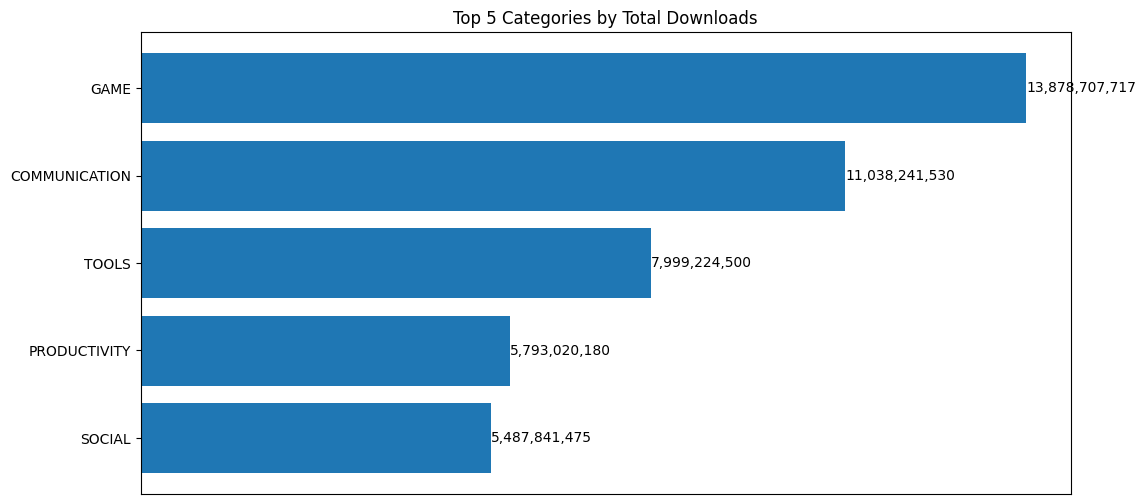

In [85]:
# Extracting the top 5 genres and their corresponding total downloads
top_5 = result_sorted.head(5)
Category = top_5.index
Installs = top_5['Total Downloads']

# Fixing random state for reproducibility (not strictly necessary in this case)
np.random.seed(19680801)

# Create a horizontal bar chart with a wider figure
fig, ax = plt.subplots(figsize=(12, 6))  # Increase width here

# Positions on the y-axis
y_pos = np.arange(len(Category))

# Create the bar chart
ax.barh(y_pos, Installs, align='center')

# Set the labels for the y-axis using the genres
ax.set_yticks(y_pos)
ax.set_yticklabels(Category)

# Invert the y-axis to have the Category from top to bottom
ax.invert_yaxis()

# Set the title of the plot
ax.set_title('Top 5 Categories by Total Downloads')

# Remove the x-axis
ax.get_xaxis().set_visible(False)

# Adding the download numbers with formatting to the bars
for i in range(len(Category)):
    ax.text(Installs.iloc[i], y_pos[i], f'{Installs.iloc[i]:,}', va='center')

# Display the plot
plt.show()

*Frequency table by genre*

In [86]:
df["Installs"] = df["Installs"].astype(str)
df["Installs"] = df["Installs"].str.replace('[+,]', '', regex=True).astype(int)
frequency_table_genres = df["Genres"].value_counts()
downloads_per_genres = df.groupby("Genres")["Installs"].sum()
result = pd.DataFrame({
    "App Count": frequency_table_genres,
    "Total Downloads": downloads_per_genres
})
result_sorted = result.sort_values(by="Total Downloads", ascending=False)

print(result_sorted.head())

               App Count  Total Downloads
Genres                                   
Communication        256      11038241530
Tools                716       7989224500
Productivity         300       5793020180
Social               203       5487841475
Photography          263       4649143130


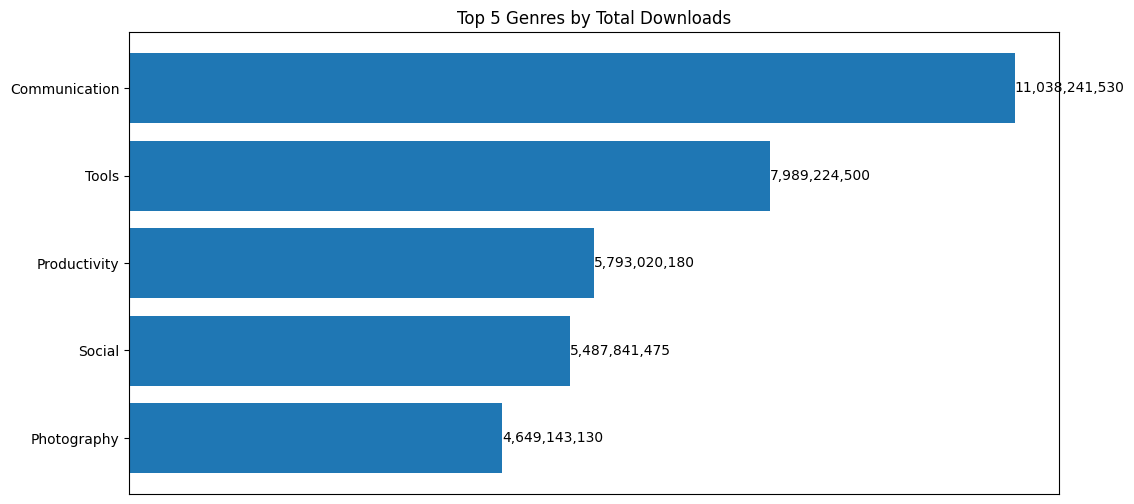

In [87]:
# Extracting the top 5 genres and their corresponding total downloads
top_5 = result_sorted.head(5)
Genres = top_5.index
Installs = top_5['Total Downloads']

# Fixing random state for reproducibility (not strictly necessary in this case)
np.random.seed(19680801)

# Create a horizontal bar chart with a wider figure
fig, ax = plt.subplots(figsize=(12, 6))  # Increase width here

# Positions on the y-axis
y_pos = np.arange(len(Genres))

# Create the bar chart
ax.barh(y_pos, Installs, align='center')

# Set the labels for the y-axis using the genres
ax.set_yticks(y_pos)
ax.set_yticklabels(Genres)

# Invert the y-axis to have the genres from top to bottom
ax.invert_yaxis()

# Set the title of the plot
ax.set_title('Top 5 Genres by Total Downloads')

# Remove the x-axis
ax.get_xaxis().set_visible(False)

# Adding the download numbers with formatting to the bars
for i in range(len(Genres)):
    ax.text(Installs.iloc[i], y_pos[i], f'{Installs.iloc[i]:,}', va='center')

# Display the plot
plt.show()

# Revenue Estimation #

In [88]:
df_paid.loc[:, 'Price'] = df_paid['Price'].str.replace('$', '').astype(float)
df_paid.loc[:, 'Installs'] = df_paid['Installs'].str.replace('[+,]', '', regex=True).astype(int)
df_paid['Revenue'] = df_paid['Price'] * df_paid['Installs']

# Find the top 10 revenue-generating apps
top_revenue_apps = df_paid.sort_values(by='Revenue', ascending=False).head(10)

# Display the results
print(top_revenue_apps[['App', 'Revenue']])

                                App     Revenue
2241                      Minecraft  69900000.0
5351                      I am rich  39999000.0
5356              I Am Rich Premium  19999500.0
4034                  Hitman Sniper   9900000.0
7417  Grand Theft Auto: San Andreas   6990000.0
2883            Facetune - For Free   5990000.0
5578        Sleep as Android Unlock   5990000.0
8804            DraStic DS Emulator   4990000.0
4367       I'm Rich - Trump Edition   4000000.0
5354                 I am Rich Plus   3999900.0


D:\Temp\ipykernel_69040\2158103159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid['Revenue'] = df_paid['Price'] * df_paid['Installs']


In [ ]:
df_paid.head()